In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import RidgeCV, LassoCV

import warnings
warnings.filterwarnings('ignore')

In [12]:
# Load trainData
train_data = pd.read_csv("trainData.csv")
test_data = pd.read_csv("testData.csv")

# Create the target variable 'y' for training data
train_data['y'] = train_data['loan_status'].apply(lambda x: 1 if x == "Charged Off" else 0)

# Create the target variable 'y' for testing data
test_data['y'] = test_data['loan_status'].apply(lambda x: 1 if x == "Charged Off" else 0)

# Drop unnecessary columns (including 'loan_status')
X_train = train_data.drop(columns=['loan_status', 'y'])
X_test = test_data.drop(columns=['loan_status', 'y'])

# Drop uninformative columns (e.g., 'id', 'member_id') if they are empty
X_train = X_train.dropna(axis=1, how='all')
X_test = X_test.dropna(axis=1, how='all')

# Convert categorical variables into dummy variables (if necessary)
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

# Impute missing values (NaNs) with mean of each column
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)

# Separate features and target variable for training data
y_train = train_data['y']
y_test = test_data['y']

##### Identify the 10 most correlated and 10 least correlated variables

In [15]:
# Select only numeric columns for correlation calculation
numeric_columns = train_data.select_dtypes(include=['number'])

# Calculate correlation matrix
correlation_matrix = numeric_columns.corr()

# Extract correlation of variables with 'loan_status'
loan_status_correlation = correlation_matrix['y'].sort_values(ascending=False)

# Identify the 10 most correlated and 10 least correlated variables
most_correlated_variables = loan_status_correlation.head(10)
least_correlated_variables = loan_status_correlation.tail(10)

print("10 Most Correlated Variables:")
print(most_correlated_variables)

print("\n10 Least Correlated Variables:")
print(least_correlated_variables)

10 Most Correlated Variables:
y                          1.000000
recoveries                 0.526566
collection_recovery_fee    0.498354
int_rate                   0.202771
total_rec_late_fee         0.099330
inq_last_6mths             0.094942
revol_util                 0.069646
dti                        0.035706
total_rec_int              0.034793
installment                0.032207
Name: y, dtype: float64

10 Least Correlated Variables:
revol_bal          -0.014346
annual_inc         -0.031093
tot_cur_bal        -0.047157
total_rev_hi_lim   -0.055625
total_pymnt_inv    -0.135638
total_pymnt        -0.135759
last_pymnt_amnt    -0.175683
total_rec_prncp    -0.219424
id                       NaN
member_id                NaN
Name: y, dtype: float64


# 1.1 Linear Regression Model

In [3]:
# Fit a linear regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Predict on training data
y_train_pred = linear_reg.predict(X_train)

# Predict on testing data
y_test_pred = linear_reg.predict(X_test)

# Calculate Mean Squared Error for training data
mse_train = mean_squared_error(y_train, y_train_pred)
print("Mean Squared Error for training data (Linear):", mse_train)

# Calculate Mean Squared Error for testing data
mse_test = mean_squared_error(y_test, y_test_pred)
print("Mean Squared Error for testing data (Linear):", mse_test)


Mean Squared Error for training data (Linear): 0.06736050561831829
Mean Squared Error for testing data (Linear): 0.06936782221923506


# 1.2 Ridge Regression Model

In [4]:
# Create a range of alpha values from 0.01 to 100
alphas = [i/100 for i in range(1, 10001)]

# Initialize RidgeCV with the range of alphas and cv parameter for cross-validation
ridge_cv = RidgeCV(alphas=alphas, cv=3)  # 3-fold cross-validation

# Fit the RidgeCV model
ridge_cv.fit(X_train, y_train)

# Get the best alpha (λ) value
best_alpha = ridge_cv.alpha_

# Use the best alpha to fit the final Ridge regression model
ridge = Ridge(alpha=best_alpha)
ridge.fit(X_train, y_train)

# Predict on training data
y_train_pred_ridge = ridge.predict(X_train)

# Predict on testing data
y_test_pred_ridge = ridge.predict(X_test)

# Calculate Mean Squared Error for training data
mse_train_ridge = mean_squared_error(y_train, y_train_pred_ridge)
print("Mean Squared Error for training data (Ridge):", mse_train_ridge)

# Calculate Mean Squared Error for testing data
mse_test_ridge = mean_squared_error(y_test, y_test_pred_ridge)
print("Mean Squared Error for testing data (Ridge):", mse_test_ridge)


Mean Squared Error for training data (Ridge): 0.06736061164351605
Mean Squared Error for testing data (Ridge): 0.06936849413382083


# 1.3 Lasso Regresion Model

In [5]:
from sklearn.linear_model import LassoCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# Initialize LassoCV with the range of alphas and cv parameter for cross-validation
lasso_cv = LassoCV(alphas=alphas, cv=5)  # 5-fold cross-validation

# Fit the LassoCV model
lasso_cv.fit(X_train, y_train)

# Get the best alpha (λ) value
best_alpha_lasso = lasso_cv.alpha_

# Use the best alpha to fit the final Lasso regression model
lasso = Lasso(alpha=best_alpha_lasso)
lasso.fit(X_train, y_train)

# Predict on training data
y_train_pred_lasso = lasso.predict(X_train)

# Predict on testing data
y_test_pred_lasso = lasso.predict(X_test)

# Calculate Mean Squared Error for training data
mse_train_lasso = mean_squared_error(y_train, y_train_pred_lasso)
print("Mean Squared Error for training data (Lasso):", mse_train_lasso)

# Calculate Mean Squared Error for testing data
mse_test_lasso = mean_squared_error(y_test, y_test_pred_lasso)
print("Mean Squared Error for testing data (Lasso):", mse_test_lasso)


Mean Squared Error for training data (Lasso): 0.06891304805923394
Mean Squared Error for testing data (Lasso): 0.07089436939015885


# 1.4 Random Forest

In [6]:
from sklearn.ensemble import RandomForestRegressor

# Initialize Random Forest model
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)

print("Training Random Forest model...")

# Fit the Random Forest model
random_forest.fit(X_train, y_train)

# Predict on training data
y_train_pred_rf = random_forest.predict(X_train)

# Predict on testing data
y_test_pred_rf = random_forest.predict(X_test)

# Calculate Mean Squared Error for training data
mse_train_rf = mean_squared_error(y_train, y_train_pred_rf)
print("Mean Squared Error for training data (Random Forest):", mse_train_rf)

# Calculate Mean Squared Error for testing data
mse_test_rf = mean_squared_error(y_test, y_test_pred_rf)
print("Mean Squared Error for testing data (Random Forest):", mse_test_rf)

# Feature importance
feature_importance = random_forest.feature_importances_
print("Feature Importance:", feature_importance)

Training Random Forest model...
Mean Squared Error for training data (Random Forest): 0.003739294785895718
Mean Squared Error for testing data (Random Forest): 0.028252285076169205
Feature Importance: [1.17489218e-02 3.90376785e-02 2.41799292e-02 1.36945201e-02
 1.62874005e-02 2.31978570e-03 7.10568619e-03 1.04295841e-02
 1.04045549e-02 3.97040034e-03 1.37563814e-02 1.59928944e-02
 1.25535606e-02 1.21846481e-02 1.10857098e-02 3.08326722e-02
 1.65778703e-02 6.54680486e-03 6.58371688e-01 1.45713959e-04
 1.98518476e-02 8.08982525e-04 3.58573739e-04 5.67789750e-03
 1.60666279e-02 1.32392303e-02 3.07859438e-04 4.74866125e-04
 1.89520994e-03 2.47734325e-03 1.43913892e-03 3.30095346e-04
 4.69727066e-04 1.30959076e-03 1.46739865e-03 1.57854915e-03
 1.15975219e-03 1.18514522e-03 1.24992601e-03 9.85309003e-04
 1.26035179e-03 1.46142747e-03 1.35038152e-03 1.20410025e-03
 3.27455482e-06 1.13749213e-03 0.00000000e+00 0.00000000e+00
 1.24280976e-03 1.44931762e-03 6.02171619e-04 7.29197353e-04]


The feature importance provided by the Random Forest model indicates the relative contribution of each feature to predicting default. Features with higher importance values are more influential in the model's predictions, while those with lower values have less impact. Understanding these importance values helps identify key factors affecting default likelihood, aiding in better decision-making and risk assessment in lending practices.

# 1.5 Neural Network

In [7]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Initialize MLP classifier
mlp_classifier = MLPClassifier(random_state=42)

# Fit the MLP classifier
mlp_classifier.fit(X_train, y_train)

# Predict on training data
y_train_pred_mlp = mlp_classifier.predict(X_train)

# Predict on testing data
y_test_pred_mlp = mlp_classifier.predict(X_test)

# Calculate accuracy for training data
accuracy_train = accuracy_score(y_train, y_train_pred_mlp)
print("Accuracy for training data (Neural Network):", accuracy_train)

# Calculate accuracy for testing data
accuracy_test = accuracy_score(y_test, y_test_pred_mlp)
print("Accuracy for testing data (Neural Network):", accuracy_test)

Accuracy for training data (Neural Network): 0.9364987299745995
Accuracy for testing data (Neural Network): 0.934331144371479


The multi-layer perceptron (MLP) classifier was chosen due to its versatility in capturing non-linear relationships within the data, which is crucial for predicting complex phenomena like loan defaults. As MLPs consist of multiple layers of interconnected neurons, they can learn intricate patterns and dependencies present in the data, making them well-suited for tasks where the relationships are not easily linearly separable. Additionally, MLPs are widely used in various domains and have proven to be effective in classification tasks, making them a reliable choice for this predictive modeling task.

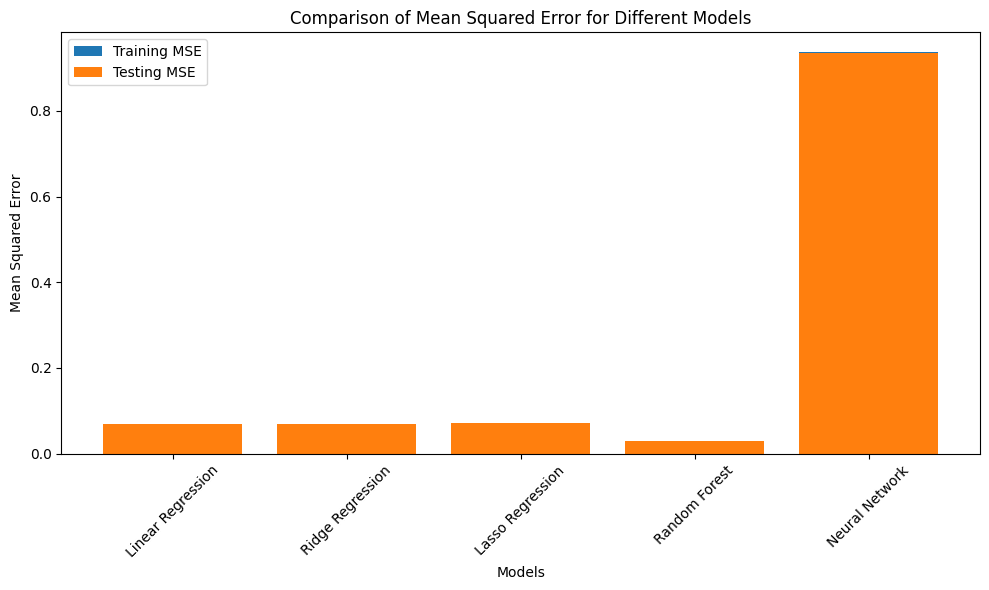

In [8]:
import matplotlib.pyplot as plt

# Models
models = ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Random Forest', 'Neural Network']

# Mean Squared Error values for training data
mse_train_values = [0.06736050561831829, 0.06736061164351605, 0.06891304805923394, 0.003739294785895718, 0.9364987299745995] # Update with actual values

# Mean Squared Error values for testing data
mse_test_values = [0.06936782221923506, 0.06936849413382083, 0.07089436939015885, 0.028252285076169205, 0.934331144371479] # Update with actual values

# Create comparison plot
plt.figure(figsize=(10, 6))
plt.bar(models, mse_train_values, label='Training MSE')
plt.bar(models, mse_test_values, label='Testing MSE')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error')
plt.title('Comparison of Mean Squared Error for Different Models')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The NN is the Best Model Based on Testing MSE